<a href="https://colab.research.google.com/github/solobala/FEML23/blob/master/FEML23_DZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к занятию «Классификация: Логистическая регрессия и SVM»

---



**Цель**: 

изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

**Описание задания**:

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

## Импорт библиотек и вспомогательные функции

In [ ]:
from zipfile import ZipFile # Загрузка данных
import fnmatch
import os

import numpy as np  # Для работы с данными
import pandas as pd 

import seaborn as sns  # Библиотеки для визуализации результатов 
import matplotlib as mpl
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer # библиотека для заполнения пропусков  в данных
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # библиотека для кодирования категриальных переменных
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


import scipy.stats # Библиотеки для работы со статистикой
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [ ]:
def plot_categories(features, axes):
    """Создает `countplot` для категорий выбранных признаков."""
    for feature, axis in zip(features, axes.ravel()):
        plt.sca(axis) # Set the current Axes to ax and the current Figure to the parent of ax.
        frequencies = data[feature].value_counts(normalize=True).round(2) * 100
        
        feature_plot = sns.countplot(
            x=data[feature], palette="Blues_r", alpha=0.8, order=frequencies.index)
        feature_plot.set_xticklabels(feature_plot.get_xticklabels(),rotation = 30)
        elements = feature_plot.containers
        
        for element in elements:
            labels = frequencies.astype(int).astype(str) + "%"
            feature_plot.bar_label(
                element, label_type="center", padding=18, labels=labels
            )

        plt.ylabel("К-во")


In [ ]:
def plot_nominals(features, axes):
    """Создает `histplot` для категорий выбранных признаков."""
    for feature, axis in zip(features, axes.ravel()):
        plt.sca(axis) # Set the current Axes to ax and the current Figure to the parent of ax.
      
        
        feature_plot = plt.hist(data[feature], bins=15);
        # elements = feature_plot.containers
        
        # for element in elements:
        #     labels = frequencies.astype(int).astype(str) + "%"
        #     feature_plot.bar_label(
        #         element, label_type="center", padding=18, labels=labels
        #     )

        # plt.ylabel("К-во")

## Получение данных и загрузка их в рабочую среду

In [ ]:
!wget -O "lection_2.zip" "https://u.netology.ru/backend/uploads/lms/attachments/files/data/28580/Лекция_2.zip"   # Качаем архив выбранного датасета

with ZipFile('lection_2.zip', 'r') as zip_file:  # Распаковываем архив в сессионное хранилище в папку ml-latest-small. Нам понадобятся файлы ratings.csv и movies.csv
    print(zip_file.infolist())
    for item in zip_file.infolist():
      if fnmatch.fnmatch(item.filename, '*adult.csv'):

        zip_file.extract(item.filename)
        os.rename(item.filename,"adult.csv")

--2023-03-23 06:27:30--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/28580/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_2.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 947717 (926K) [application/x-zip-compressed]
Saving to: ‘lection_2.zip’

lection_2.zip       100%[===================>] 925.50K  1.14MB/s    in 0.8s    

2023-03-23 06:27:32 (1.14 MB/s) - ‘lection_2.zip’ saved [947717/947717]

[<ZipInfo filename='ïÑ¬µ¿∩_2/' external_attr=0x10>, <ZipInfo filename='ïÑ¬µ¿∩_2/adult.csv' compress_type=deflate external_attr=0x20 file_size=5326368 compress_size=563554>, <ZipInfo filename='ïÑ¬µ¿∩_2/athletes.csv' compress_type=deflate external_attr=0x20 file_size=764969 compress_size=266767>, <ZipInfo filename='ïÑ¬µ¿∩_2/cars.csv' compress_type=deflate external_attr=0x20 file_size=64676 compress_size=9776>, <ZipInfo filen

In [ ]:
data = pd.read_csv('/content/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K.

## Первичный анализ данных

In [ ]:
data.shape # Сколько строк и столбцов? 14 features, 1 target

(48842, 15)

In [ ]:
data.info()  # Тип данных features, к-во non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Eсть ли дубликаты?
duplicateRows = data[data.duplicated()]
duplicateRows

In [ ]:
# Удалим их
data = data.drop_duplicates()
data.shape

(48790, 15)

In [ ]:
# Категориальные features - определяем по типу object. Вместе с target их 9
cat_features = data.select_dtypes("object").columns
print(*cat_features, sep=", ")

workclass, education, marital-status, occupation, relationship, race, gender, native-country, income


In [ ]:
# Количественные features - определяем по типу numeric
numerical_features = data.select_dtypes("number").columns
print(*numerical_features, sep=", ")

age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week


In [ ]:
# fnlwgt - это просто идентификатор для внутреннего использования, который не несет смысловой нагрузки. Его убираем

In [ ]:
# Есть подозрение, что education и education_num - это одно и то же. Если это так, то можно будет использовать только education
data[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
10,Doctorate,16.0
14,Prof-school,15.0
12,Masters,14.0
9,Bachelors,13.0
7,Assoc-acdm,12.0
8,Assoc-voc,11.0
15,Some-college,10.0
11,HS-grad,9.0
2,12th,8.0
1,11th,7.0


In [ ]:
# 2 признака - capital-gain и capital-loss можно заменить на saldo=capital-gain - capital-loss
data['saldo'] = data['capital-gain'] -  data ['capital-loss']

In [ ]:
data.drop(['capital-gain', 'capital-loss', 'educational-num', 'fnlwgt'], axis=1,inplace=True)

In [ ]:
# Обновленный список количественных признаков
numerical_features = data.select_dtypes("number").columns
print(*numerical_features, sep=", ")

age, hours-per-week, saldo


## Работа с категориальными признаками

Описание признаков:


*  age: Возраст.
*  workclass: Класс работы - Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked (8).

*   education: Образование -Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool (16)

*   marital-status: Семейный статус - Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (7)
*   occupation: Профессия Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces (14)
*   relationship: Степень родства - Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried (6)
*   race: Раса - White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black (5)
*   sex: Пол - Female, Male (2)
*   saldo: Баланс капитала

*   hours-per-week: Часовая нагрузка
*   native-country: Страна United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands (41)


In [ ]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


Максимальное к-во уникальных категорий - у признака native-country( 42), однако более 90% взрослых являются уроженцами США ( на визуализации не приведено, т.к затруднено визуальное восприятие большого числа категорий).

У target нет пропусков ( к-во уникальных значений =2 )

In [ ]:
# считаем к-во уникальных значений в категориальных features  
for cat_feature in cat_features.difference({"income"}):
    print(data[cat_feature].value_counts(), end="\n\n")

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

Male      32650
Female    16192
Name: gender, dtype: int64

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India           

значений типа nan нет, но очевидно есть пропуски, обозначенные ?, у признаков workclass, occupation ,native-country

Категории в workclass, education, marital-status, occupation, relationship, race, gender


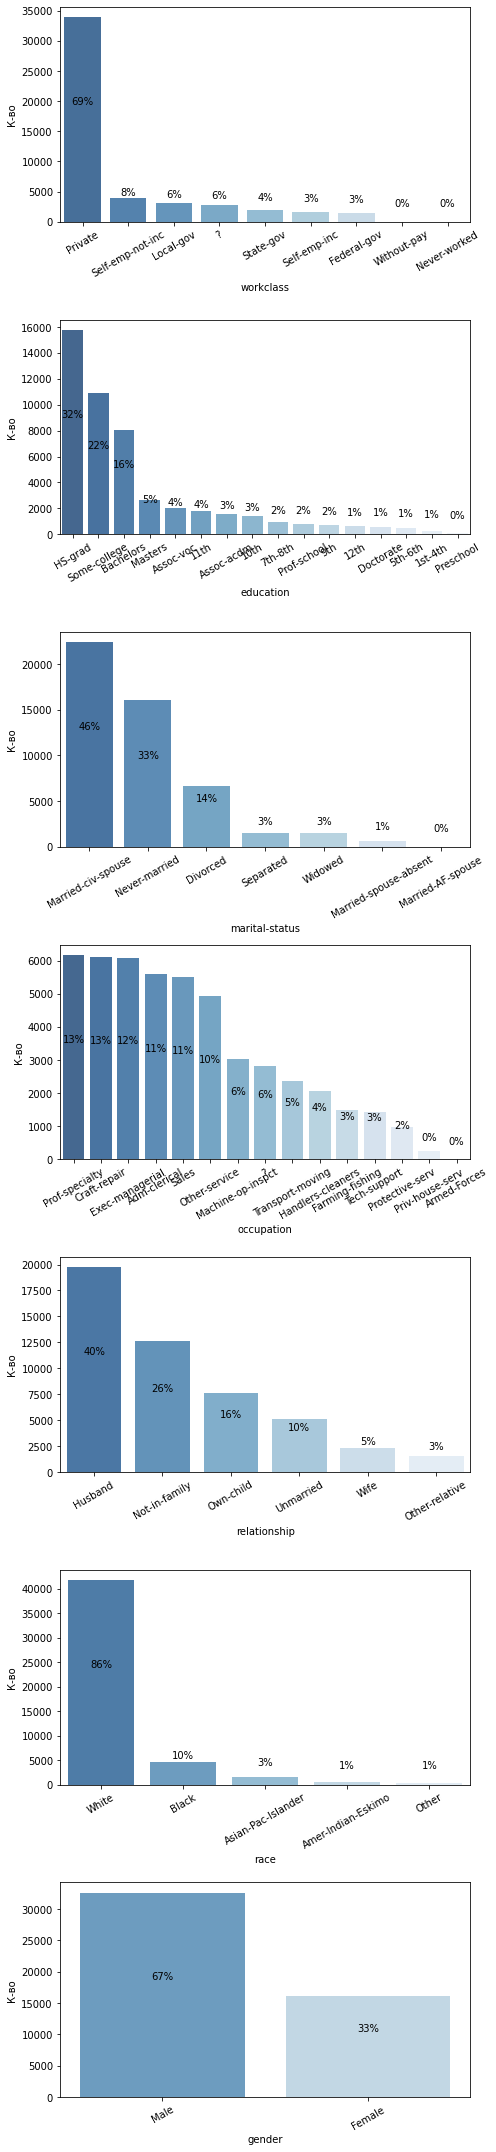

In [ ]:
print("Категории в workclass, education, marital-status, occupation, relationship, race, gender")
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(7, 30), squeeze=False)
# fig.suptitle("Категории в workclass, education, marital-status, occupation, relationship, race, gender", fontsize=14)

plot_categories(("workclass", "education", "marital-status", "occupation", "relationship", "race", "gender"), axes)
plt.tight_layout() # Упорядочивает субплоты
plt.show()


Краткие наблюдения: мужчин почти в 2 раза больше, чем женщин; Подавляющее большинство взрослых - белой расы (86%). 70% работает в частном секторе. В основном сведения о состоящих в браке и холостых ( в сумме ок. 80%). 

Все категории несбалансированы, поэтому будем  использовать most frequence strategy (т.е заполнять '?' Наиболее часто встречающимся значением - модой)

[]

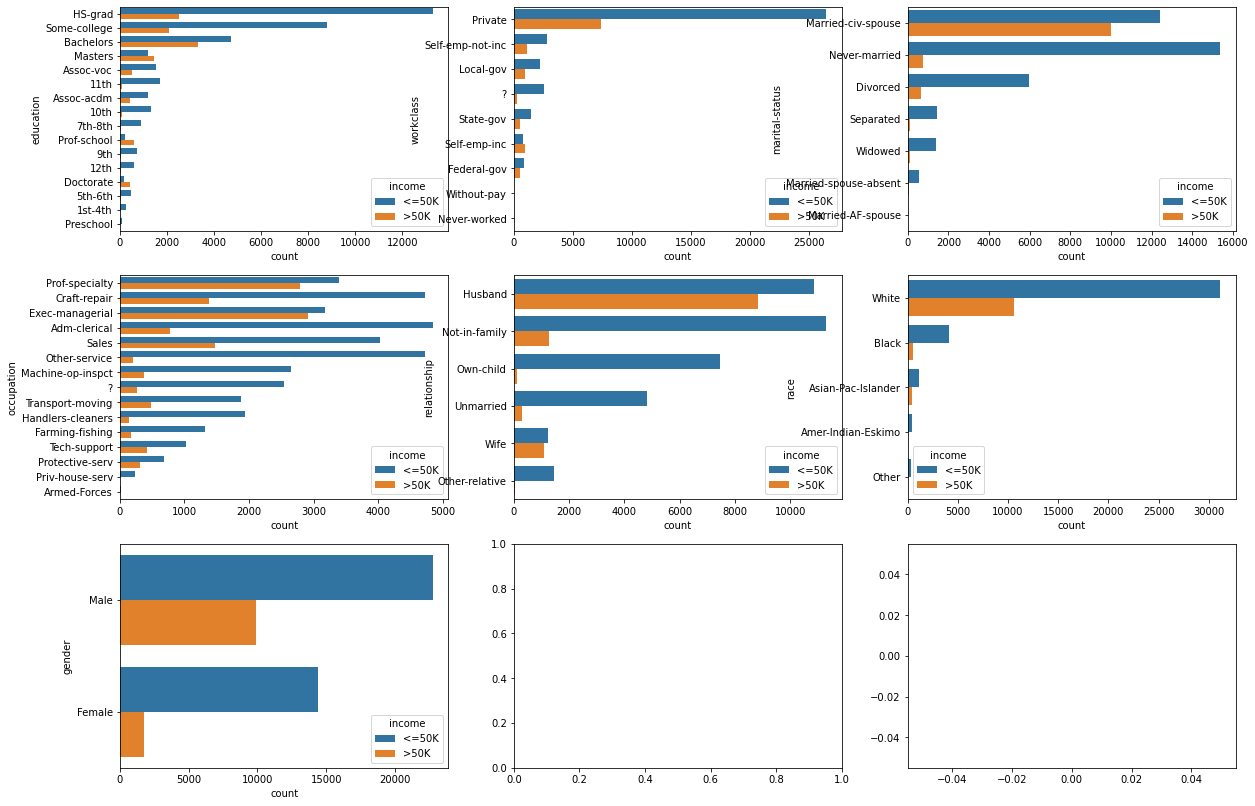

In [ ]:
# Посмотрим на рапределение дохода внутри категорий
cat_income = ['education','workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,14))

[sns.countplot(y=feature, hue='income', data=data, order=data[feature].value_counts().index , ax=axs.flatten()[idx]) for idx, feature in enumerate(cat_income)]
plt.plot()

Краткие наблюдения:
1. educatuion: Высокий доход преобладает в категориях masters, prof-school , doctorate. 
2. workclass: Доля Высокого дохода у self-emp-inc незначительно преобладает над долей низкого, в остальных категориях  все наоборот
3. martial-status - во всех категориях преобладает доля низкого дохода. В категории зарегистрированных браков - самая большая доля высокого дохода.
4. occupation:У exec-managerial - практически равное соотношение высокого и низкого доходов, у прочих превалирует низкий доход.
5. relationship: практически равное соотношение высокого и низкого доходов и hasband и wife, что отражает картину  в п. 3 martial-status
6. race: у white самая большая доля высокого дохода по сравнению с остальными расами, хотя у всех преоблажает низкий доход
7. gender: У мужчин саще встречается высокий доход, чему  женщин

## Работа  с количественными признаками

In [ ]:
data_num = data[numerical_features]
data_num.describe()

,age,hours-per-week,saldo
count,48842.000000,48842.000000,48842.000000
mean,38.643585,40.422382,991.565313
std,13.710510,12.391444,7475.549906
min,17.000000,1.000000,-4356.000000
25%,28.000000,40.000000,0.000000
50%,37.000000,40.000000,0.000000
75%,48.000000,45.000000,0.000000
max,90.000000,99.000000,99999.000000


Количественные данные - на несколько порядков различаются. Будем использовать StanDardScaler для стандартизации

In [ ]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

from numpy.random import seed

In [ ]:
def shapiro_test(df,names):
    """
    Служебная функция для вывода информации по тесту Шапиро-Уилкса
    """
    seed(1)
    for name in names:
        stat, p = shapiro(df[name])
        print(name)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Предположительно нормальное распределение (Недостаточно данных, чтобы отвергнуть H0)')
        else:
            print('Отвергаем H0 о нормальности распределения')
        print()

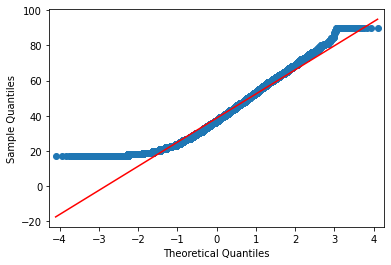

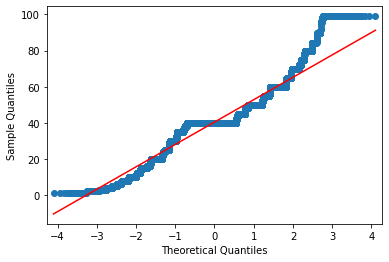

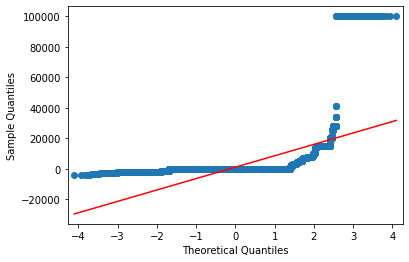

In [ ]:

seed(1)
qqplot(data['age'], line='s')
qqplot(data['hours-per-week'], line='s')
qqplot(data['saldo'], line='s')
plt.show()

In [ ]:

shapiro_test(data,["age", "hours-per-week", "saldo"])

age
Statistics=0.967, p=0.000
Отвергаем H0 о нормальности распределения

hours-per-week
Statistics=0.884, p=0.000
Отвергаем H0 о нормальности распределения

saldo
Statistics=0.139, p=0.000
Отвергаем H0 о нормальности распределения



/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Вывод:распределение количeственных признаков не является нормальным. И оно разное!

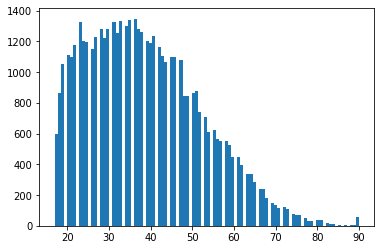

In [ ]:
plt.hist(data["age"], bins=100);

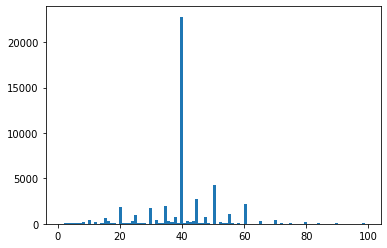

In [ ]:
plt.hist(data["hours-per-week"], bins=100);


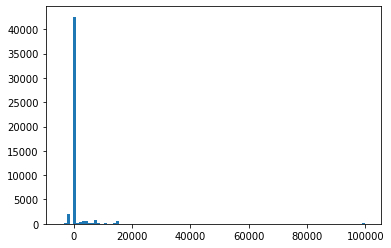

In [ ]:
plt.hist(data["saldo"], bins=100);

In [ ]:
# Попробуем применить

## Корреляция количественных признаков

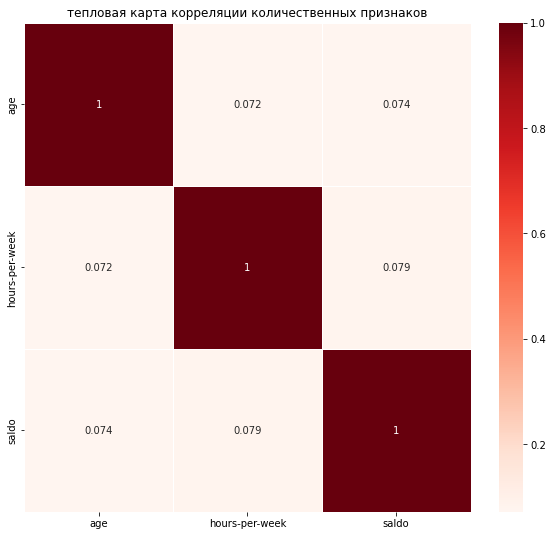

In [ ]:
plt.figure(figsize=(10,9))  
sns.heatmap(data_num.corr(),annot=True,linewidths=.5, cmap="Reds")
plt.title('тепловая карта корреляции количественных признаков')
plt.show()

Вывод - очень слабая корреляция, количественные признаки незваисимы

## Работа с пропусками

In [ ]:
# Простой вариант заполнения пропусков
attrib, counts = np.unique(data['workclass'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'][data['workclass'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['occupation'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'][data['occupation'] == '?'] = most_freq_attrib 

attrib, counts = np.unique(data['native-country'], return_counts = True)
most_freq_attrib = attrib[np.argmax(counts, axis = 0)]
data['native-country'][data['native-country'] == '?'] = most_freq_attrib 

## Преобразование категориальных признаков

In [ ]:
 # Закодируем native-country как 1 - USA, 0 - Other. просто представлены не все страны, дальше сложно будет прогнозировать, если появится новая страна.
data['native-country'] = data['native-country'].apply(lambda x: 1 if x.strip() == "United-States" else 0)

Кодирование атегориальных признаков также будет выполняться в papelines. Для gender и income выбираем labelEncoder, для "workclass", "education", "marital-status", "occupation", "relationship", "race" - OneHotEncoder

In [ ]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income,saldo
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,1,<=50K,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,1,<=50K,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1,>50K,0
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1,>50K,7688
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,30,1,<=50K,0


In [ ]:
# Выберем отдельно признаки
features = data.drop('income', axis=1)

In [ ]:
features.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,saldo
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,1,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,1,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,1,0
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,1,7688
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,30,1,0


In [ ]:
# Выполним кодирование gender
le = LabelEncoder()
le.fit(features['gender'])
le.classes_

array(['Female', 'Male'], dtype=object)

In [ ]:
features['gender'] = pd.Series(data=le.transform(features['gender']))
features.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,saldo
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,1,40,1,0
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,50,1,0
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,1,40,1,0
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,40,1,7688
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,0,30,1,0


In [ ]:
features.shape

(48842, 11)

In [ ]:
# Выберем категориальные признаки для One-Hot кодирования
selected = ["workclass", "education", "marital-status", "occupation", "relationship", "race"]
selectedColumns = features[selected]

In [ ]:
# переведем категориальные переменные в значения 0 и 1, добавив столбцы с соответствующими названиями для "workclass", "education", "marital-status", "occupation", "relationship", "race", "gender"

encoded_features = pd.get_dummies(selectedColumns, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race"])
encoded_features.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
other_features = features.loc[:, ~features.columns.isin(selected)]
other_features.head()

,age,gender,hours-per-week,native-country,saldo
0,25,1,40,1,0
1,38,1,50,1,0
2,28,1,40,1,0
3,44,1,40,1,7688
4,18,0,30,1,0


In [ ]:
# Было 11 колонок признаков. Убрали 6. осталось 5. добавили 56. стало 61

In [ ]:
X = pd.concat([other_features, encoded_features], axis=1)
X.head()

,age,gender,hours-per-week,native-country,saldo,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,25,1,40,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,38,1,50,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,28,1,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,1,40,1,7688,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,18,0,30,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
# Выполним кодирование target
le = LabelEncoder()
le.fit(data['income'])
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [ ]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.Series(data=le.transform(data['income']))
y.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

## Разделение выборки на обучающее и тестовое подмножества

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Построение pipelines

In [ ]:
model1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
model2 = make_pipeline(
    StandardScaler(),
    SVC()
)

## Обучение моделей логистической регрессии и опорных векторов на обучающем подмножестве.

In [ ]:
import time

In [ ]:
X_train

,age,gender,hours-per-week,native-country,saldo,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
37193,42,1,40,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31093,52,1,35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
33814,34,1,40,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14500,28,0,40,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
23399,46,1,50,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,1,40,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
44732,34,1,50,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
38158,28,0,40,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
860,46,0,40,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
%time
model1.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
%time
predictions1 = model1.predict(X_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [ ]:
%time #  На самом деле обучение заняло 2 минуты
model2.fit(X_train, y_train)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
%time # а предсказание 15 секунд
predictions2 = model2.predict(X_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


## Предсказание уровня дохода и сравнение с истинным значением на тестовом подмножестве

In [ ]:
%time
model1.predict(X_test) # Предсказание модели Logistic regression

CPU times: user 20 µs, sys: 0 ns, total: 20 µs
Wall time: 24.1 µs


array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
%time
model2.predict(X_test) # Предсказание модели SVC

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 7.63 µs


array([0, 0, 1, ..., 1, 0, 1])

## Точность предсказания моделей с использованием встроенной функции score

In [ ]:
model1.score(X_train, y_train) 

0.8440867094924884

In [ ]:
model1.score(X_test,y_test)

0.8538233186610708

In [ ]:
model2.score(X_train, y_train) # Заняло минуту

0.857292759706191

In [ ]:
model2.score(X_test,y_test)

0.8527996724332071

## Проверка гипотез

In [ ]:
results_balanced=[]

solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
for solver in solvers:
  model1 = make_pipeline(
      StandardScaler(),
      LogisticRegression(max_iter=1000, solver=solver))
  model1.fit(X_train, y_train)
  model1.predict(X_test)
  model1.predict_proba(X_test)
  results_balanced.append({"solver": solver, 
                  "train_score": model1.score(X_train, y_train),
                  "test_score":  model1.score(X_test, y_test) })
  
print('Рeзультаты оптимизации модели логистической регрессии')  
for result in results_balanced:
  print(f'solver: {result["solver"]} train_score: {result["train_score"]} test_score" {result["test_score"]}')


Рeзультаты оптимизации модели логистической регрессии
solver: lbfgs train_score: 0.8440867094924884 test_score" 0.8538233186610708
solver: liblinear train_score: 0.8440867094924884 test_score" 0.8538233186610708
solver: newton-cg train_score: 0.8440867094924884 test_score" 0.8538233186610708
solver: newton-cholesky train_score: 0.8440867094924884 test_score" 0.8538233186610708
solver: sag train_score: 0.8440867094924884 test_score" 0.8538233186610708
solver: saga train_score: 0.8440867094924884 test_score" 0.8538233186610708


Гипотеза об улучшении качества предсказаний при помощи изменения solver не подтвердилась

In [ ]:
%time # почти 12 минут
results_balanced2=[]

kernels = ['poly']
degrees=[3,4,5]
for kernel in kernels:
  for degree in degrees:
    model1 = make_pipeline(
      StandardScaler(),
      SVC(kernel=kernel, degree=degree, class_weight='balanced')
    )
    model1.fit(X_train, y_train)
    model1.predict(X_test)
    # model1.predict_proba(X_test)
    results_balanced2.append({"kernel": kernel, "degree": degree, 
                    "train_score": model1.score(X_train, y_train),
                    "test_score":  model1.score(X_test, y_test) })
print('Рeзультаты работы модели SVC')  
for result in results_balanced2:
  print(f'kernel: {result["kernel"]} "degree": {result["degree"]} train_score: {result["train_score"]} test_score" {result["test_score"]}')


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs
Рeзультаты работы модели SVC
kernel: poly "degree": 3 train_score: 0.7986333273616052 test_score" 0.7812468011055379
kernel: poly "degree": 4 train_score: 0.8028561922555217 test_score" 0.780427884123247
kernel: poly "degree": 5 train_score: 0.8053899111918716 test_score" 0.7794042378953834


Гипотеза об улучшении качества предсказания модели при использовании kernel ='poly' и изменении степени от 3 до 5 также не подтвердилась

## Выводы по работе
Кратко опишите какие преобразования были сделаны с данными.
Сравните точность двух моделей.
Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

С данными были выполнены следующие пребразования:
1. Пропущенные значения признаков workclass, occupation ,native-country заполнены с использованием стратегии “most_frequent”
2. Удалены признаки education_num и fnlwgt
3. Категориальные признаки "workclass", "education", "marital-status", "occupation", "relationship", "race" кодированы с помощью get_dummies()
4. Категориальный признак nature-country кодирован следующим образом: 1, если родина США, и 0, если нет
3. Категориальный признак gender и целевая переменная income кодированы с помощью LabelEncoder.

Далее вектор признаков Х и вектор целевой переменной y были разделены на 2 подмножества - для обучения (X_train, y_train) и оценки качества модели (X_test, y_test).

Были построены 2 модели классификации: Logistic Regression  и SVC. В обоих случаях была получена удовлетворительная точность, но качество предсказания у Logistic Regression оказалось чуть выше (0.8538233186610708 против 0.8527996724332071). При этом Logistic Regression и справляется с работой в разы быстрее,чем SVC.
Попытки усовершенствования обеих моделей результата не дали. Вероятно, требуется использовать иные классификаторы - GB, XGB, KNN